<a href="https://colab.research.google.com/github/mariuszaugustynek/SILAB/blob/master/Copy_of_Laboratorium_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety - to już znamy
# Dla uproszczenia wybieramy tylko cechę trzecią i czwartą, tj długość i szerokość płatków
X = iris.data[:, [2, 3]]
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
# Jak dotąd jest podobnie do Laboratorium 2
kmn = KMeans(n_clusters=3)

# Uczymy klasyfikator na danych treningowych
# Pierwsza różnica - uczenie przebiega bez nadzoru
# To znaczy nie pokazujemy klasyfikatorowi prawidłowych klas - gatunków kwiatów
# Zgodnie z konfiguracją wcześniej - powiedzieliśmy tylko że chcemy w zbiorze znaleźć 3 klasy
# Dokładny opis algorytmu: https://scikit-learn.org/stable/modules/clustering.html#k-means
kmn.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

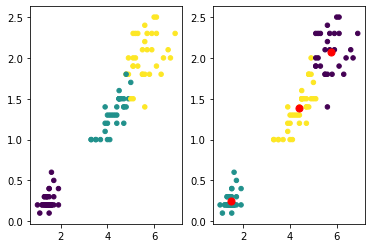

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Wyciągamy punkty centralne klastrów - pokażemy je na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Różnice kolorów pomiędzy wykresami są nieistotne

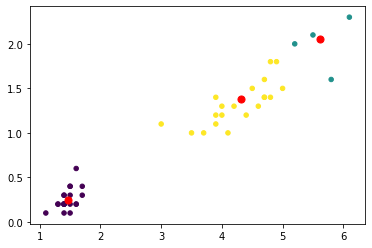

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

In [0]:
#@title Default title text
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze


from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn.model_selection import train_test_split


samochody = fetch_openml('cars1')
# Zobaczmy jak wyglądają elementy zbioru
print('Elementy zbioru: ', list(samochody.keys()))
print('Typ pierwszego elementu z \'data\': ', type(samochody['data'][0]))
print('Cechy samochodów w zbiorze to: ', samochody['feature_names'])
print('Kilka pierwszych elementów:')
print(samochody['data'][0:5])

print(samochody.DESCR)

Elementy zbioru:  ['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Cechy samochodów w zbiorze to:  ['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
Kilka pierwszych elementów:
[[1.400e+01 4.000e+00 3.500e+02 1.650e+02 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 1.000e+00 8.900e+01 7.100e+01 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 4.000e+00 3.020e+02 1.400e+02 3.449e+03 1.100e+01 1.971e+03]
 [1.500e+01 4.000e+00 4.000e+02 1.500e+02 3.761e+03 1.000e+01 1.971e+03]
 [3.050e+01 1.000e+00 9.800e+01 6.300e+01 2.051e+03 1.700e+01 1.978e+03]]
cars1-pmlb

Downloaded from openml.org.


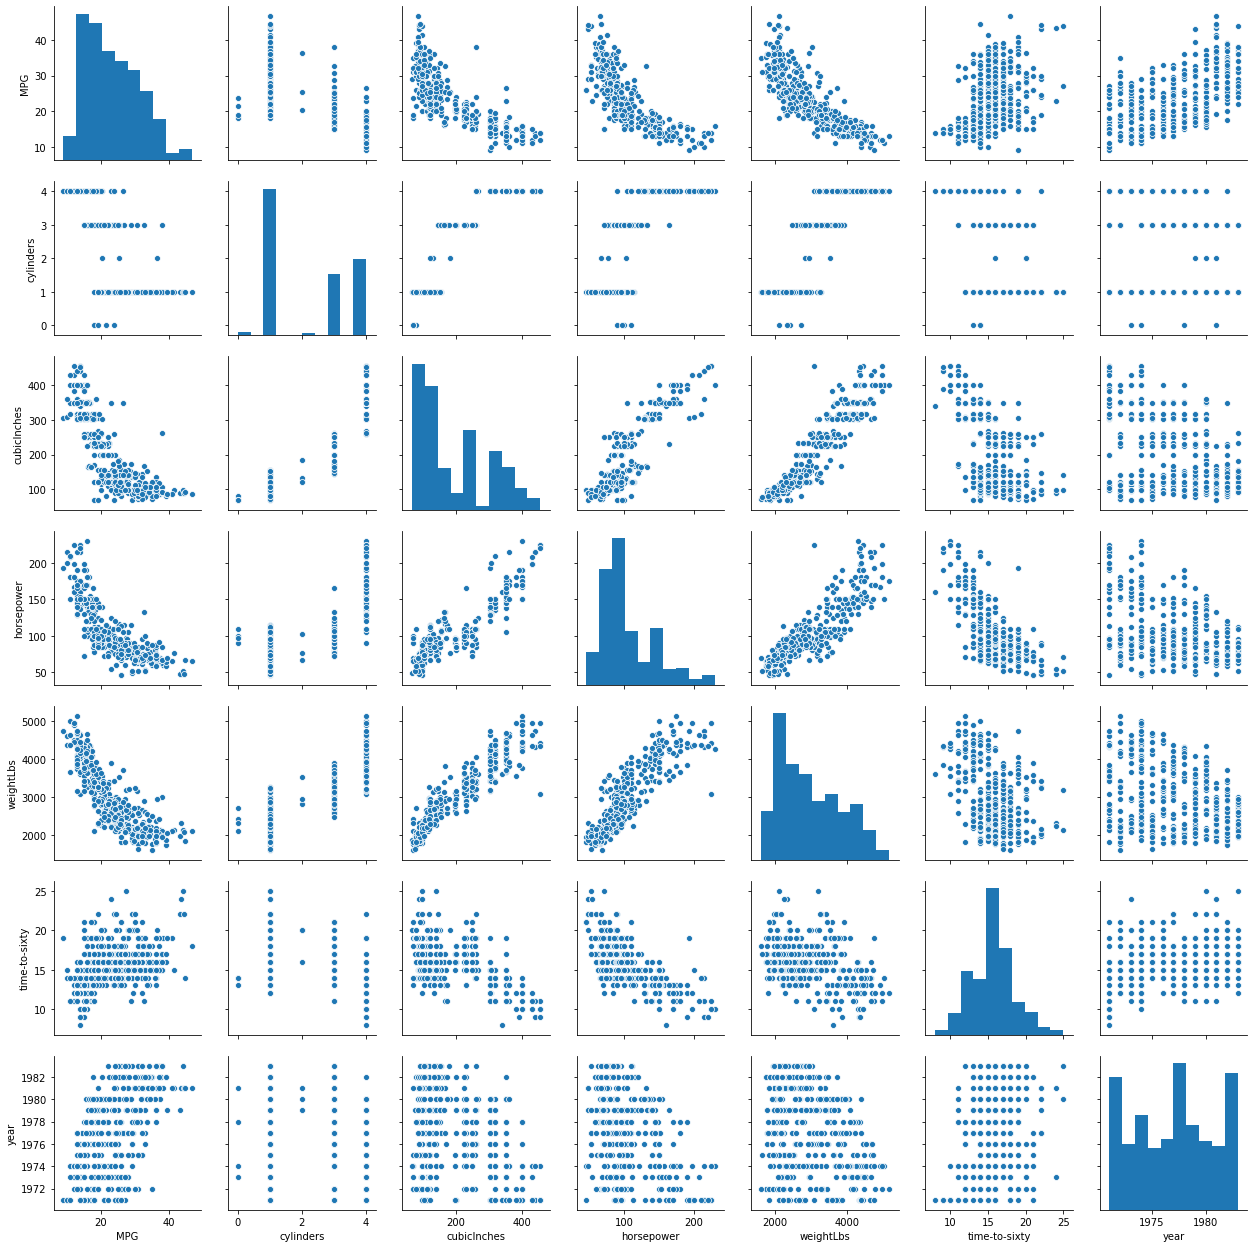

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns

cars_df = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])

sns.pairplot(cars_df)
plt.show()

In [13]:
from sklearn.cluster import KMeans

X = samochody.data[:, [0, 3, 5]]
y = samochody.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
kmn = KMeans(n_clusters=3)
kmn.fit(X_train)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

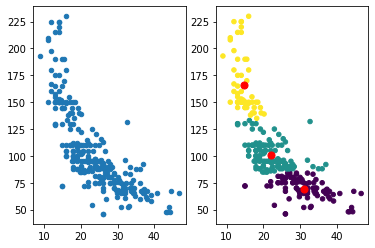

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

centra = kmn.cluster_centers_
fig, ax = plt.subplots(1, 2)

y_pred_train = kmn.predict(X_train)

ax[0].scatter(X_train[:, 0], X_train[:, 1], s=20)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

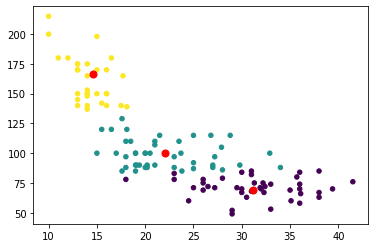

In [17]:
y_pred = kmn.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

In [0]:
samochody.keys()

In [0]:
# Ściąga: Konwersja typów dla y

y = samochody['target']
y = [int(elem) for elem in y]
y[:5]

In [0]:
# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze
# 
# Klasifikator podzielił zbiór danych na 3 klasy według przyśpieszenia do 100 km, ilości koni mechanicznych i spalania paliwa. Widać że wraz z wrostem jednej z tych cech
# wrastaja też pozostałe. Możemy podzielić samochody na 3 klasy: ekonomiczną, średnią i sportową